In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
tweets = pd.read_csv("demonetization-tweets_data.csv",encoding = "ISO-8859-1")
tweets.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,11/23/2016 18:40,False,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,11/23/2016 18:40,False,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
2,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,11/23/2016 18:39,False,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False
3,RT @gauravcsawant: Rs 40 lakh looted from a ba...,False,0,NaN,11/23/2016 18:38,False,NaN,"<a href=""http://twitter.com/download/android"" ...",bhodia1,637,True,False
4,RT @sumitbhati2002: Many opposition leaders ar...,False,0,NaN,11/23/2016 18:38,False,NaN,"<a href=""http://twitter.com/download/android"" ...",sumitbhati2002,1,True,False


In [3]:
tweets.iloc[tweets['retweetCount'].idxmax()]['text'] ##maximum no.of tweets been posted this...

'RT @RNTata2000: The government\x92s bold implementation of the demonetization programme needs the nation\x92s support. https://t.co/tx1ZILSor8'

In [4]:
tweets.iloc[tweets['retweetCount'].idxmin()]['text'] ##minimum no.of tweets been posted this...

'@Jaggesh2 Bharat band on 28??<ed><U+00A0><U+00BD><ed><U+00B8><U+0082>Those who  are protesting #demonetization  are all different party leaders.'

In [5]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string,re

In [11]:
def clean_text(tweets):
    tweets=word_tokenize(tweets)
    tweets=tweets[4:]#remove RT@
    tweets=" ".join(tweets)
    tweets=re.sub('https','',tweets)
    tweets=[char for char in tweets if char not in string.punctuation]
    tweets=''.join(tweets)
    tweets=[word for word in tweets.split() if word.lower() not in stopwords.words('english')]
    return' '.join(tweets)

In [12]:
tweets['cleaned_text']=tweets['text'].apply(clean_text)

In [14]:
tweets['cleaned_text'].head()

0    Critical question PayTM informed Demonetizatio...
1    Former FinSec RBI Dy Governor CBDT Chair Harva...
2    Reddy Wedding mailtoday cartoon demonetization...
3    Rs 40 lakh looted bank Kishtwar J amp K Third ...
4    Many opposition leaders narendramodi Demonetiz...
Name: cleaned_text, dtype: object

In [15]:
features=tweets['cleaned_text']
processed_features=[]
for sentence in range(0,len(features)):
    processed_feature=re.sub(r'\W'," ",str(features[sentence]))##removing all the special characters
    processed_feature=re.sub(r'\s+[a-zA-Z]\s+'," ",processed_feature)##removing single character appearing in the text except first
    processed_feature=re.sub(r'\^[a-zA-Z]\s+'," ",processed_feature)##removing single character appearing in the first
    processed_feature=re.sub(r'\s+'," ",processed_feature,flags=re.I)##removing multiple space with a single space
    processed_feature=re.sub(r'^b\s+'," ",processed_feature)##removing prefix b
    processed_feature=processed_feature.lower()
    processed_features.append(processed_feature)

In [19]:
tweets['processed_text']=processed_features
tweets['processed_text'].head()

0    critical question paytm informed demonetizatio...
1    former finsec rbi dy governor cbdt chair harva...
2    reddy wedding mailtoday cartoon demonetization...
3    rs 40 lakh looted bank kishtwar amp third inci...
4    many opposition leaders narendramodi demonetiz...
Name: processed_text, dtype: object

In [27]:
#applying ngrams
ngrams_text=list(nltk.ngrams(tweets['processed_text'],5))
ngrams_text[:3]

[('critical question paytm informed demonetization edict pm clearly fishy requires full disclosure amp',
  'former finsec rbi dy governor cbdt chair harvard professor lambaste demonetization aam aadmi listen th',
  'reddy wedding mailtoday cartoon demonetization reddywedding tcou7glnrq31f',
  'rs 40 lakh looted bank kishtwar amp third incident since demonetization terrorists',
  'many opposition leaders narendramodi demonetization respect decision support oppositio'),
 ('former finsec rbi dy governor cbdt chair harvard professor lambaste demonetization aam aadmi listen th',
  'reddy wedding mailtoday cartoon demonetization reddywedding tcou7glnrq31f',
  'rs 40 lakh looted bank kishtwar amp third incident since demonetization terrorists',
  'many opposition leaders narendramodi demonetization respect decision support oppositio',
  'narendramodi demonetization respect decision support opposition bcoz party'),
 ('reddy wedding mailtoday cartoon demonetization reddywedding tcou7glnrq31f',


In [31]:
#porterstemmer helps in removing the morphological endings from the word in english
from nltk.stem.porter import PorterStemmer
def stemmer_get_text(corpus):
    stemmer=PorterStemmer()
    return[' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]
tweets['porter_stemer']=stemmer_get_text(tweets['processed_text'])
tweets['porter_stemer'].head()

0    critic question paytm inform demonet edict pm ...
1    former finsec rbi dy governor cbdt chair harva...
2    reddi wed mailtoday cartoon demonet reddywed t...
3    rs 40 lakh loot bank kishtwar amp third incid ...
4    mani opposit leader narendramodi demonet respe...
Name: porter_stemer, dtype: object

In [37]:
#lancaster stemmer helps in finding the frequency
from nltk.stem import LancasterStemmer
def stemmer_get_text(corpus):
    stemmer=LancasterStemmer()
    return[' '.join([stemmer.stem(word) for word in review.split()])for review in corpus]
tweets['lancaster_stemmer']=stemmer_get_text(tweets['processed_text'])
tweets['lancaster_stemmer'].head()

0    crit quest paytm inform demonet edict pm clear...
1    form finsec rbi dy govern cbdt chair harvard p...
2    reddy wed mailtoday cartoon demonet reddywed t...
3    rs 40 lakh loot bank kishtw amp third incid si...
4    many opposit lead narendramod demonet respect ...
Name: lancaster_stemmer, dtype: object

In [39]:
#snowball stemmer is similar to porterstemmer but it specify the word english
from nltk.stem import SnowballStemmer
def stemmer_get_text(corpus):
    stemmer=SnowballStemmer('english')
    return[' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]
tweets['snow_stem']=stemmer_get_text(tweets['processed_text'])
tweets['snow_stem'].head()

0    critic question paytm inform demonet edict pm ...
1    former finsec rbi dy governor cbdt chair harva...
2    reddi wed mailtoday cartoon demonet reddywed t...
3    rs 40 lakh loot bank kishtwar amp third incid ...
4    mani opposit leader narendramodi demonet respe...
Name: snow_stem, dtype: object

In [42]:
from nltk.stem import WordNetLemmatizer ##it lemmatized word into one common root
def stemmer_get_text(corpus):
    stemmer=WordNetLemmatizer()
    return[' '.join([stemmer.lemmatize(word) for word in review.split()]) for review in corpus]
tweets['lema_text']=stemmer_get_text(tweets['processed_text'])
tweets['lema_text'].head()

0    critical question paytm informed demonetizatio...
1    former finsec rbi dy governor cbdt chair harva...
2    reddy wedding mailtoday cartoon demonetization...
3    r 40 lakh looted bank kishtwar amp third incid...
4    many opposition leader narendramodi demonetiza...
Name: lema_text, dtype: object

In [50]:
tweets['lema_str']=[' '.join(map(str,l))for l in tweets['lema_text']]
tweets['lema_str'].head()

0    c r i t i c a l   q u e s t i o n   p a y t m ...
1    f o r m e r   f i n s e c   r b i   d y   g o ...
2    r e d d y   w e d d i n g   m a i l t o d a y ...
3    r   4 0   l a k h   l o o t e d   b a n k   k ...
4    m a n y   o p p o s i t i o n   l e a d e r   ...
Name: lema_str, dtype: object

In [51]:
tweets['word_count']=tweets['lema_text'].apply(lambda x:len(str(x).split()))
tweets['word_count'].head()

0    13
1    15
2     7
3    12
4     9
Name: word_count, dtype: int64

In [52]:
tweets['review_len']=tweets['lema_str'].astype(str).apply(len)
tweets['review_len'].head()

0    197
1    203
2    145
3    159
4    169
Name: review_len, dtype: int64

In [54]:
from textblob import TextBlob
def generate_polarity(text):
    sentiment=TextBlob(text).sentiment
    return sentiment

In [57]:
sentiment=tweets['lema_text'].apply(generate_polarity)
sentiment=sentiment.to_frame()
sentiment.head()

,lema_text
0,"(0.15, 0.5777777777777778)"
1,"(0.0, 0.0)"
2,"(0.0, 0.0)"
3,"(0.0, 0.0)"
4,"(0.5, 0.5)"


In [58]:
tweets['sentiment score']=sentiment

In [61]:
tweets['polarity']=sentiment['lema_text'].apply(lambda x:x[0])
tweets['polarity'].head()

0    0.15
1    0.00
2    0.00
3    0.00
4    0.50
Name: polarity, dtype: float64

Text(0, 0.5, 'frequency')

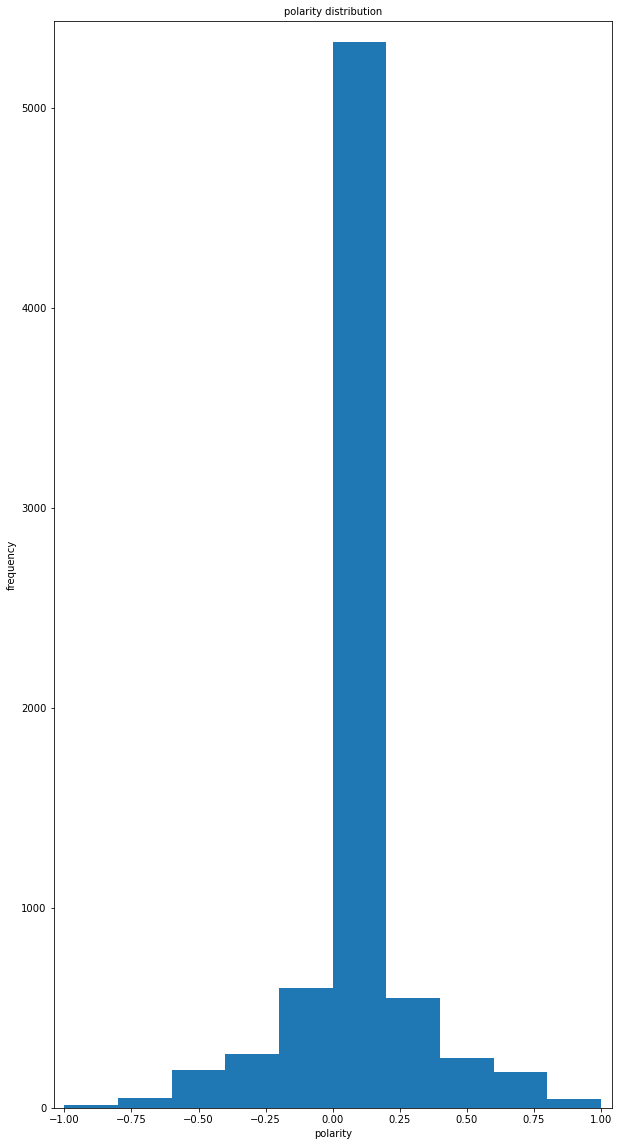

In [66]:
plt.figure(figsize=(10,20))
plt.margins(0.02)
plt.hist(tweets['polarity'])
plt.title('polarity distribution',fontsize=10)
plt.xlabel('polarity')
plt.ylabel('frequency')

In [67]:
tweets['encoded polarity']=['positive'if x>0 else 'negative' if x<0 else 'neutral' for x in tweets['polarity']]

In [70]:
tweets['encoded polarity'].value_counts()

neutral     3767
positive    2581
negative    1122
Name: encoded polarity, dtype: int64

##conclusion:we can see that demonization has more numbers of tweets which are neutral

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(lowercase=True,ngram_range=(1,1),stop_words='english')
x=tweets['processed_text']
y=tweets['encoded polarity']

In [74]:
x_vect=vectorizer.fit_transform(x)
x_vect=pd.DataFrame(x_vect.toarray(),columns=vectorizer.get_feature_names())
x_vect.head()

,00716,01,0276gaubert,04,10,100,1000,10000,1000th,100rs,...,yt,yugayatri,zeenews,zeenewshindi,zerch,zero,zerohedge,zindabad,zomatoin,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##after using Tfidf we can use this for train and test portion and apply various algorithm in this model to check its accuracy and its complexity 